# Praktikum Principal Component Analysis (PCA)


## 1. Import Library

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from  sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (8, 6)

## 2. Konek ke Gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Load dataset wine

In [5]:
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 4. Ekplorasi awal dataset wine

* Menampilkan informasi umum dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

* Menampilkan statistik deskriptif dataset

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


* Mencek missing value

In [8]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


* Cek duplikat pada dataset

In [9]:
df.duplicated().sum()

np.int64(0)

* Disktribusi kelas target

In [10]:
print('Nama kelas:', wine.target_names)
df['target'].value_counts()

Nama kelas: ['class_0' 'class_1' 'class_2']


,count
target,
1,71
0,59
2,48


## 5. Pemisahan Fitur dan Label

In [11]:
# fitur dan label
X = wine.data
y = wine.target

print('Shape X:', X.shape)
print('Shape y:', y.shape)

Shape X: (178, 13)
Shape y: (178,)


## 6. Pembagian data latih dan data uji (Train-Test Split)

In [12]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)

Shape X_train: (142, 13)
Shape X_test: (36, 13)


## 7. Standardisasi Data (Mean = 0, Std = 1)

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474],
       [ 0.94851892, -0.76544542,  1.25317383,  0.85328406,  0.09178497,
         1.17279546,  1.33318146, -0.59045701,  1.34974202,  0.30530313,
         1.06715537,  0.15104809,  1.81576773],
       [ 0.52335419, -0.51940939,  0.9540342 , -1.04643312, -0.44567755,
         0.93057163,  1.006382  , -0.1695489 , -0.26000178, -0.081509  ,
        -0.12834302,  0.89317174,  1.51620262],
       [ 0.97352861, -0.55585917,  0.16879269, -1.0761162 , -0.71440882,
         0.52686525,  0.81662747, -0.59045701,  0.36312485,  0.262324  ,
         0.8900445 ,  0.42752553,  1.93226527],
       [ 0.43582027,  0.82012009,  0.05661533,  0.55645325, -0.51286037,
        -0.55506784, -1.29175618,  0.75644894, -0.60618325,  1.47433535,
        -1.76661859, -1.43505932, -0.29783054]])

## 8. Penerapan Model SVM tanpa PCA (Baseline Model)

In [14]:
# Model SVM tanpa PCA
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print('Akurasi tanpa PCA:', acc_no_pca)

print('\nClassification Report (tanpa PCA):')
print(classification_report(y_test, y_pred_no_pca, target_names=wine.target_names))

Akurasi tanpa PCA: 0.9722222222222222

Classification Report (tanpa PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 9. Penerapan PCA (Principal Component Analysis)

In [15]:
# PCA dengan 3 komponen utama
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Shape X_train_pca:', X_train_pca.shape)
print('Shape X_test_pca:', X_test_pca.shape)

Shape X_train_pca: (142, 3)
Shape X_test_pca: (36, 3)


## 10. Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA

In [16]:
# Variasi yang dijelaskan oleh tiap komponen
explained_var = pca.explained_variance_ratio_
print('Explain Variance Ratio tiap komponen:', explained_var)
print('Total variansi yang dijelaskan 3 komponen pertama:', explained_var.sum())

Explain Variance Ratio tiap komponen: [0.35792104 0.19270671 0.11019835]
Total variansi yang dijelaskan 3 komponen pertama: 0.6608261082211259


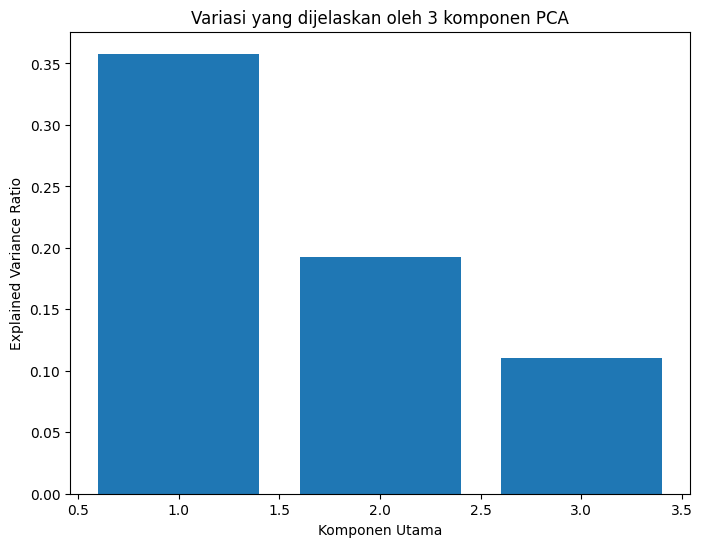

In [17]:
plt.bar([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variasi yang dijelaskan oleh 3 komponen PCA')
plt.show()

## 11. Membangun Model SVM dengan PCA

In [18]:
# Model SVM dengan PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
y_pred_pca = svm_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print('Akurasi SVM dengan PCA (3 komponen):', acc_pca)

print('\nClassification Report (dengan PCA):')
print(classification_report(y_test, y_pred_pca, target_names=wine.target_names))

Akurasi SVM dengan PCA (3 komponen): 0.9722222222222222

Classification Report (dengan PCA):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 12. Visualisasi PCA dalam Ruang 3 Dimensi

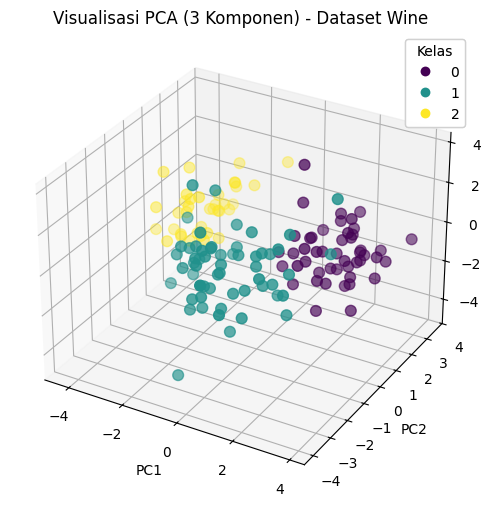

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend1 = ax.legend(
    *scatter.legend_elements(),
    title='Kelas'
)

ax.add_artist(legend1)
plt.show()

## 13. Perbandingan Model SVM Tanpa PCA dan Dengan PCA

In [20]:
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM dengan PCA (3 komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [acc_no_pca, acc_pca],
    'Variasi Total PCA': [None, explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variasi Total PCA
0,SVM Tanpa PCA,13,0.972222,NaN
1,SVM dengan PCA (3 komponen),3,0.972222,0.660826


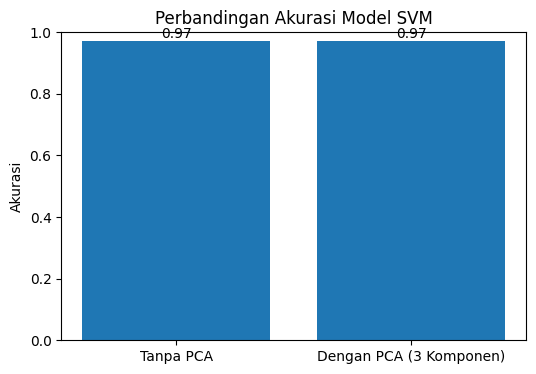

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'], [acc_no_pca, acc_pca])
plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
for i, v in enumerate([acc_no_pca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
plt.show()

# Praktikum Mandiri

## 1. Load dataset

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum12/data/Breast_Cancer_Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Ekplorasi dataset

* Informasi umum dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* Menampilkan statistik deskriptif

In [24]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


* Mencek missing value

In [25]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


* Menghapus missing value

In [26]:
df = df.drop(columns=['Unnamed: 32'])

* Mencek kembali missing value

In [27]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


* Mencek duplikasi

In [28]:
df.duplicated().sum()

np.int64(0)

## 3. Memisahkan antara fitur dan label



In [29]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

## 4. Ubah label menjadi numerik

In [30]:
y = y.map({'M': 1, 'B': 0})

print(X.shape)
print(y.shape)

(569, 31)
(569,)


## 5. Membagi dataset menjadi train dan test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)

Shape X_train: (455, 31)
Shape X_test: (114, 31)


## 3. Standarisasi fitur

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]

array([[-2.43221088e-01,  5.18558727e-01,  8.91825791e-01,
         4.24631702e-01,  3.83925436e-01, -9.74743706e-01,
        -6.89771505e-01, -6.88586446e-01, -3.98175254e-01,
        -1.03915470e+00, -8.25056321e-01, -1.09317755e-01,
        -5.59755400e-02, -2.10096206e-01, -1.59132582e-02,
        -1.00518399e+00, -9.11941990e-01, -6.62815884e-01,
        -6.52561081e-01, -7.01889114e-01, -2.75393571e-01,
         5.79797697e-01,  1.31324246e+00,  4.66908134e-01,
         4.45982711e-01, -5.96154777e-01, -6.34722227e-01,
        -6.10227299e-01, -2.35743918e-01,  5.45663235e-02,
         2.18367276e-02],
       [ 4.08373367e-01, -5.16364088e-01, -1.63971029e+00,
        -5.41348716e-01, -5.42961327e-01,  4.76219058e-01,
        -6.31833818e-01, -6.04281166e-01, -3.03074908e-01,
         5.21543093e-01, -4.54522896e-01, -6.04377961e-01,
        -1.00104604e+00, -5.85429002e-01, -4.93453793e-01,
         4.03212009e-01, -7.68173276e-01, -4.79187222e-01,
         1.14508478e-01, -1.42

## 4. Baseline Model (SVM tanpa PCA)

In [33]:
svm_no_pca = SVC(kernel='rbf', gamma='scale')
svm_no_pca.fit(X_train_scaled, y_train)

y_pred_no_pca = svm_no_pca.predict(X_test_scaled)
print("Accuracy tanpa PCA :", accuracy_score(y_test, y_pred_no_pca))

Accuracy tanpa PCA : 0.9649122807017544


## 5. Penerapan PCA

In [34]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Shape X_train_pca:', X_train_pca.shape)
print('Shape X_test_pca:', X_test_pca.shape)

Shape X_train_pca: (455, 3)
Shape X_test_pca: (114, 3)


## 6. Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA.

In [35]:
# Variansi yang dijelaskan oleh tiap komponen (Dataset Breast Cancer)
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio tiap komponen:", explained_var)
print("Total variansi yang dijelaskan 3 komponen pertama:", explained_var.sum())

Explained Variance Ratio tiap komponen: [0.43184634 0.17962517 0.0935514 ]
Total variansi yang dijelaskan 3 komponen pertama: 0.7050229101608617


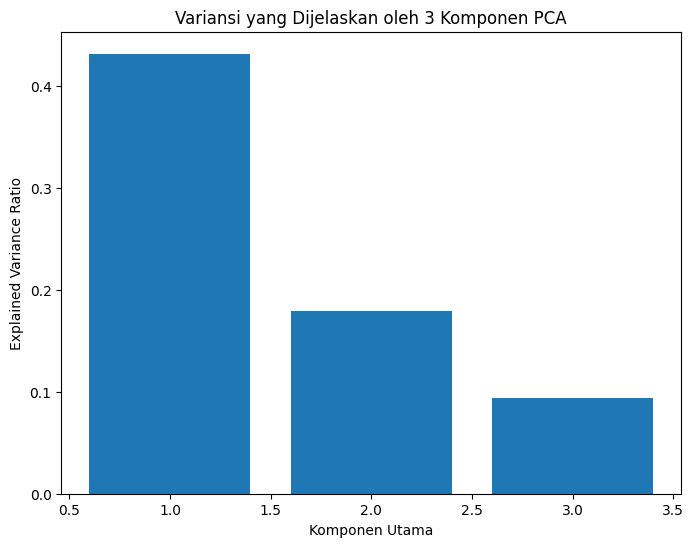

In [36]:
plt.bar([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang Dijelaskan oleh 3 Komponen PCA')
plt.show()

## 7. SVM dengan PCA

In [37]:
svm_pca = SVC(kernel='rbf', gamma='scale')
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
print("Accuracy dengan PCA :", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

Accuracy dengan PCA : 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## 8. Visualisasi PCA 3D

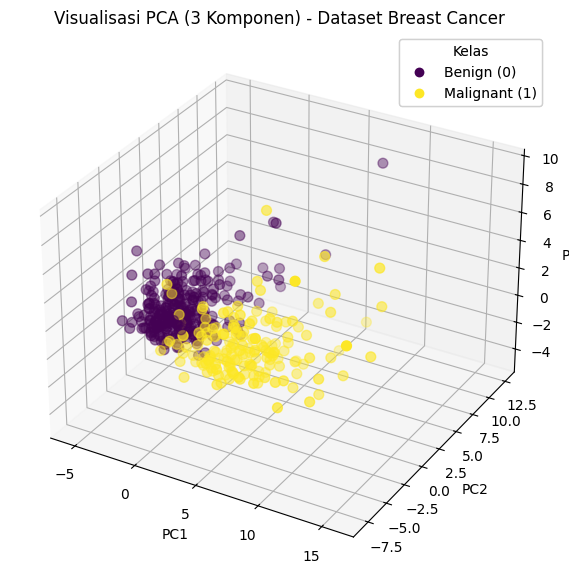

In [38]:
# Membuat figure 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data PCA (3 komponen)
scatter = ax.scatter(
    X_train_pca[:, 0],   # PC1
    X_train_pca[:, 1],   # PC2
    X_train_pca[:, 2],   # PC3
    c=y_train,           # warna berdasarkan kelas
    s=50
)

# Label sumbu
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Breast Cancer')

# Legend untuk kelas 0 & 1
legend_labels = ['Benign (0)', 'Malignant (1)']
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Kelas")
ax.add_artist(legend)

plt.show()

## 9. Perbandingan Model SVM Tanpa PCA dan Dengan PCA

In [39]:
# Simpan akurasi baseline
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Simpan akurasi PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Akurasi Tanpa PCA :", accuracy_no_pca)
print("Akurasi Dengan PCA:", accuracy_pca)

Akurasi Tanpa PCA : 0.9649122807017544
Akurasi Dengan PCA: 0.956140350877193


* Membuat tabel perbandingan

In [40]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["SVM tanpa PCA", "SVM dengan PCA (3 komponen)"],
    "Jumlah Fitur": [30, 3],
    "Akurasi": [accuracy_no_pca, accuracy_pca]
})

comparison

,Model,Jumlah Fitur,Akurasi
0,SVM tanpa PCA,30,0.964912
1,SVM dengan PCA (3 komponen),3,0.956140


* Visualisasi perbandingan akurasi

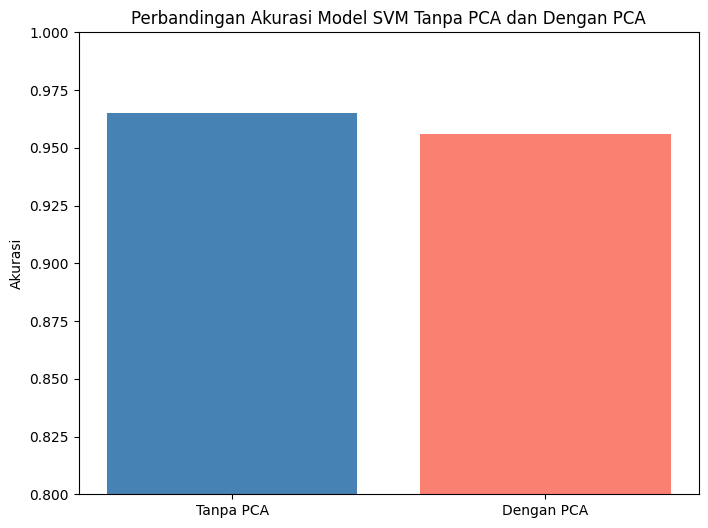

In [41]:
import matplotlib.pyplot as plt

models = ['Tanpa PCA', 'Dengan PCA']
accuracies = [accuracy_no_pca, accuracy_pca]

plt.bar(models, accuracies, color=['steelblue', 'salmon'])
plt.ylim(0.8, 1.0)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model SVM Tanpa PCA dan Dengan PCA')
plt.show()